In [1]:
import pandas as pd
import seaborn as sns
import re 
from glob import glob
from sklearn import metrics

In [2]:
def config_by_filename(f):
    exptype = "tsfresh" if "tsfresh" in f else "raw"
    p = re.compile("(\d+)min_")
    m = p.search(f)
    winsize = m.group(1)
    winconfig = "notcentered" if "notcentered" in f else "centered"
    
    return exptype, winsize, winconfig

In [3]:
files = glob("./pytorch/final*")
len(files)

36

In [4]:
dfs = []
for f in files:
    df_tmp = pd.read_csv(f)
    row = df_tmp.sort_values(by="mcc_main_y", ascending=False).head(1)
    
    exptype, winsize, winconfig = config_by_filename(f)
    row["exptype"] = exptype
    row["winsize"] = winsize
    row["winconfig"] = winconfig
    
    dfs.append(row)
df = pd.concat(dfs)
#df = pd.read_csv("./all_results_expexp_manyTo1_raw_trials50.csv")

In [5]:
# to see all of the columns
pd.set_option('display.max_columns', None)

In [6]:
df = df.sort_values("mcc_main_y", ascending=False).reset_index(drop=True)
df

,Unnamed: 0,main_y_loss,percentage_y_loss,loss,acc_main_y,prec_main_y,rec_main_y,f1_main_y,mcc_main_y,MAE_percentage_y,MSE_percentage_y,r2_percentage_y,heads,win,featset,exp_name,exptype,winsize,winconfig,all_awake_loss,all_sleep_loss,is_transition_loss,acc_all_awake,prec_all_awake,rec_all_awake,f1_all_awake,mcc_all_awake,acc_all_sleep,prec_all_sleep,rec_all_sleep,f1_all_sleep,mcc_all_sleep,acc_is_transition,prec_is_transition,rec_is_transition,f1_is_transition,mcc_is_transition
0,0,0.279836,0.054960,0.288300,0.890064,0.905200,0.952938,0.886793,0.696155,0.161213,0.054960,0.615093,manyheads,40min_centered,tsfresh,exp_manyheads_tsfresh_40min_centered_n20,tsfresh,40,centered,0.226212,0.402700,0.475863,0.916980,0.799571,0.573713,0.911129,0.633289,0.817306,0.802798,0.892383,0.815181,0.629046,0.781258,0.670099,0.511052,0.771714,0.442912
1,3,0.307158,0.076083,0.284884,0.882912,0.893476,0.953218,0.878994,0.691150,0.213482,0.076082,0.545267,manyheads,20min_centered,tsfresh,exp_manyheads_tsfresh_20min_centered_n20,tsfresh,20,centered,0.265623,0.370948,0.399395,0.891633,0.857538,0.534812,0.881444,0.622022,0.844423,0.830308,0.944663,0.839284,0.663921,0.821915,0.000000,0.000000,0.741576,0.000000
2,3,0.282852,0.054049,0.188215,0.888495,0.897872,0.960268,0.883934,0.689559,0.148549,0.054049,0.621471,twoheads,40min_centered,tsfresh,exp_twoheads_tsfresh_40min_centered_n20,tsfresh,40,centered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0.293385,NaN,0.293385,0.882486,0.890793,0.956215,0.878096,0.689426,NaN,NaN,NaN,onehead,20min_centered,tsfresh,exp_onehead_tsfresh_20min_centered_n20,tsfresh,20,centered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,0.285265,NaN,0.285265,0.886692,0.904712,0.948538,0.883629,0.687374,NaN,NaN,NaN,onehead,40min_centered,tsfresh,exp_onehead_tsfresh_40min_centered_n20,tsfresh,40,centered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,0.289539,0.059313,0.294702,0.887267,0.900263,0.955230,0.883301,0.687036,0.169155,0.059313,0.584605,manyheads,40min_centered,raw,exp_manyheads_raw_40min_centered_n20,raw,40,centered,0.221527,0.422653,0.480777,0.913550,0.787446,0.556582,0.907179,0.616355,0.813554,0.787337,0.913094,0.809948,0.624368,0.784133,0.706756,0.460079,0.768673,0.439961
6,9,0.297383,0.068317,0.202306,0.880432,0.892721,0.950381,0.876588,0.684664,0.182443,0.068317,0.591681,twoheads,20min_centered,tsfresh,exp_twoheads_tsfresh_20min_centered_n20,tsfresh,20,centered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2,0.296355,NaN,0.296355,0.885366,0.900082,0.952613,0.881538,0.682013,NaN,NaN,NaN,onehead,40min_centered,raw,exp_onehead_raw_40min_centered_n20,raw,40,centered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,0.303949,0.056912,0.106093,0.882531,0.899309,0.949371,0.878814,0.674402,0.168028,0.056912,0.601419,twoheads,40min_centered,raw,exp_twoheads_raw_40min_centered_n20,raw,40,centered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,0.307717,NaN,0.307717,0.875126,0.893664,0.942439,0.871647,0.666264,NaN,NaN,NaN,onehead,20min_notcentered,tsfresh,exp_onehead_tsfresh_20min_notcentered_n20,tsfresh,20,notcentered,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MCC comparision for NNs

tsfresh vs. raw

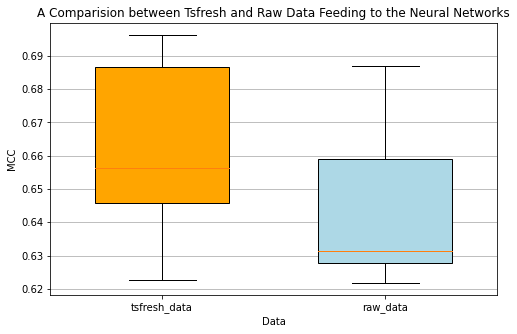

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns.boxplot(x='exptype', y='mcc_main_y', data=df)
tsfresh = df[df['exptype']=='tsfresh']['mcc_main_y']
raw = df[df['exptype']=='raw']['mcc_main_y']


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([tsfresh, raw], labels=['tsfresh_data', 'raw_data'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Tsfresh and Raw Data Feeding to the Neural Networks')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

20min vs 10min vs 40min

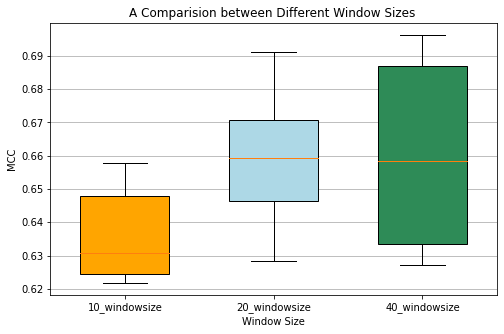

In [8]:
# sns.boxplot(x='winsize', y='mcc_main_y', data=df)

ten = df[df['winsize']== '10']['mcc_main_y']
twenty = df[df['winsize']== '20']['mcc_main_y']
fourty = df[df['winsize']== '40']['mcc_main_y']

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([ten, twenty, fourty], labels=['10_windowsize', '20_windowsize', '40_windowsize'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Different Window Sizes ')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Window Size')
ax.set_ylabel('MCC')

plt.show()

centered vs notcentered

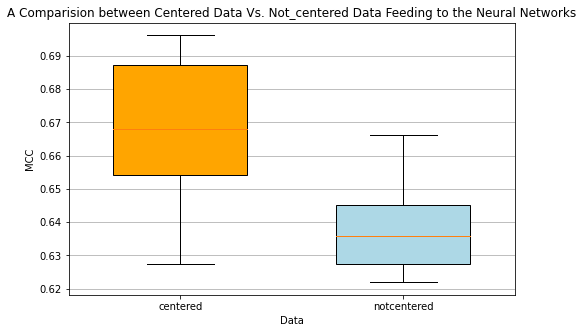

In [9]:
# sns.boxplot(x='winconfig', y='mcc_main_y', data=df)

centered = df[df['winconfig']=='centered']['mcc_main_y']
notcentered = df[df['winconfig']=='notcentered']['mcc_main_y']


fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([centered, notcentered], labels=['centered', 'notcentered'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Centered Data Vs. Not_centered Data Feeding to the Neural Networks')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

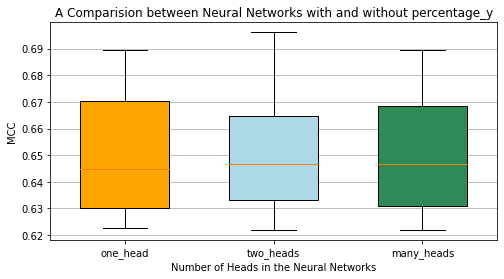

In [10]:
#two heads vs 1 head
# sns.boxplot(x='config.regression_tasks', y='mcc_main_y', data=df)

one_head = df[df['heads']=='onehead']['mcc_main_y']
two_heads = df[df['heads']!='onehead']['mcc_main_y']
many_heads = df[df['heads']!='manyheads']['mcc_main_y']

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([one_head, two_heads, many_heads], labels=['one_head', 'two_heads', 'many_heads'], 
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
                   )
ax.set_title('A Comparision between Neural Networks with and without percentage_y')

# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Number of Heads in the Neural Networks')
ax.set_ylabel('MCC')

plt.show()

In [11]:
df.iloc[0] #["experiment_tag"]

Unnamed: 0                                                   0
main_y_loss                                           0.279836
percentage_y_loss                                      0.05496
loss                                                    0.2883
acc_main_y                                            0.890064
prec_main_y                                             0.9052
rec_main_y                                            0.952938
f1_main_y                                             0.886793
mcc_main_y                                            0.696155
MAE_percentage_y                                      0.161213
MSE_percentage_y                                       0.05496
r2_percentage_y                                       0.615093
heads                                                manyheads
win                                             40min_centered
featset                                                tsfresh
exp_name              exp_manyheads_tsfresh_40min_cente

In [12]:
# #files = glob("./pycaret/*_predictions.csv.gz")
# #files

# df1 = pd.read_csv("./pycaret/sleep_ml_rf_40min_centered_tsfresh_predictions.csv.gz") # 102614
# #df[df["Label"] == True].head(10)

# df2 = pd.read_csv("../data/processed/train_test_splits/40min_centered/test_tsfresh_data.csv.gz") # 102614



# PyCaret Results

In [32]:
#df = pd.read_csv("./ml_predictions/sleep_ml_catboost_test.csv.gz")
files = glob("./pycaret/sleep_ml_*_test.csv.gz")

dfs = []
for f in files:
    dfs.append(pd.read_csv(f))

df_pycaret = pd.concat(dfs)

df_pycaret.sort_values("MCC", ascending=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,model,test,X_shape,y_train_shape,y_test_shape,window,featset
0,Light Gradient Boosting Machine,0.8980,0.9295,0.9595,0.9062,0.9321,0.7276,0.7324,lightgbm,True,1114067,1114067,112497,20min_centered,tsfresh
0,Light Gradient Boosting Machine,0.9029,0.9309,0.9614,0.9134,0.9368,0.7279,0.7323,lightgbm,True,1021182,1021182,102614,40min_centered,tsfresh
0,Light Gradient Boosting Machine,0.8983,0.9212,0.9558,0.9124,0.9336,0.7164,0.7199,lightgbm,True,1021182,1021182,102614,40min_centered,raw
0,Logistic Regression,0.8982,0.9247,0.9603,0.9088,0.9339,0.7135,0.7186,lr,True,1021182,1021182,102614,40min_centered,tsfresh
0,Extreme Gradient Boosting,0.8929,0.9241,0.9632,0.8976,0.9292,0.7105,0.7180,xgboost,True,1114067,1114067,112497,20min_centered,tsfresh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Linear Discriminant Analysis,0.8672,0.9020,0.9727,0.8663,0.9164,0.5983,0.6229,lda,True,1021182,1021182,102614,40min_centered,raw
0,Linear Discriminant Analysis,0.8595,0.8967,0.9675,0.8581,0.9095,0.6005,0.6227,lda,True,1114067,1114067,112497,20min_centered,raw
0,Logistic Regression,0.8661,0.8982,0.9696,0.8697,0.9169,0.5773,0.6007,lr,True,1021182,1021182,102614,40min_notcentered,raw
0,Linear Discriminant Analysis,0.8525,0.8912,0.9662,0.8528,0.9060,0.5694,0.5941,lda,True,1114067,1114067,112497,20min_notcentered,raw


# MCC for ML models

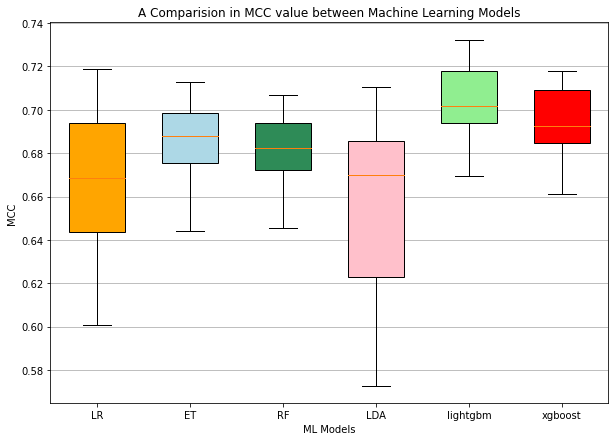

In [34]:

LR = df_pycaret[df_pycaret['Model']=='Logistic Regression']['MCC']
ET = df_pycaret[df_pycaret['Model']=='Extra Trees Classifier']['MCC']
RF = df_pycaret[df_pycaret['Model']=='Random Forest Classifier']['MCC']
LDA = df_pycaret[df_pycaret['Model']=='Linear Discriminant Analysis']['MCC']
lightgbm = df_pycaret[df_pycaret['Model']=='Light Gradient Boosting Machine']['MCC']
xgboost = df_pycaret[df_pycaret['Model']=='Extreme Gradient Boosting']['MCC']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
bplot1 =  ax.boxplot([LR, ET, RF, LDA, lightgbm, xgboost], labels=['LR', 'ET', 'RF', 'LDA', 'lightgbm', 'xgboost'],
            vert=True, patch_artist=True, 
            showfliers=False,
            widths=0.6
          )
ax.set_title('A Comparision in MCC value between Machine Learning Models')
# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen', 'red']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('ML Models')
ax.set_ylabel('MCC')

plt.show()

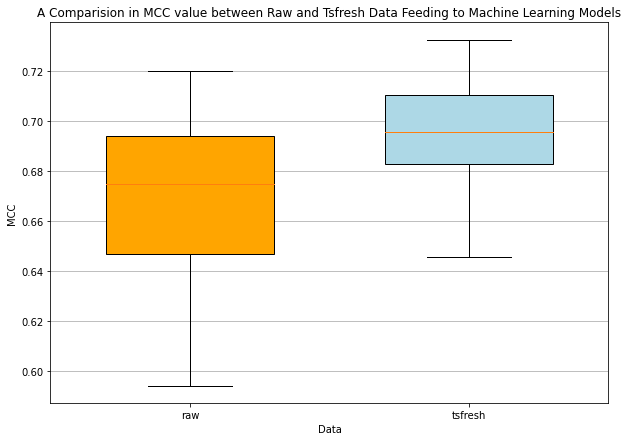

In [35]:
raw = df_pycaret[df_pycaret['featset']=='raw']['MCC']
tsfresh = df_pycaret[df_pycaret['featset']=='tsfresh']['MCC']

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([raw, tsfresh], labels=['raw', 'tsfresh'],
                    vert=True, patch_artist=True, 
                    showfliers=False,
                    widths=0.6
          )

ax.set_title('A Comparision in MCC value between Raw and Tsfresh Data Feeding to Machine Learning Models')
# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen', 'red']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

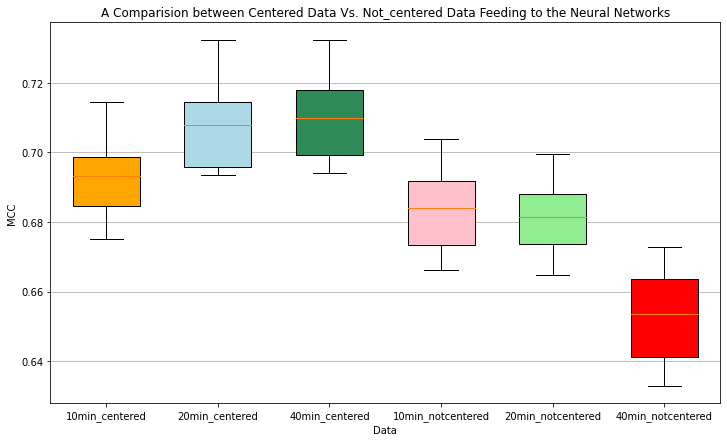

In [36]:

twenty_min_centered = df_pycaret[df_pycaret['window']=='20min_centered']['MCC']
twenty_min_notcentered = df_pycaret[df_pycaret['window']=='20min_notcentered']['MCC']
ten_min_centered = df_pycaret[df_pycaret['window']=='10min_centered']['MCC']
ten_min_notcentered = df_pycaret[df_pycaret['window']=='10min_notcentered']['MCC']
fourty_min_centered = df_pycaret[df_pycaret['window']=='40min_centered']['MCC']
fourty_min_notcentered = df_pycaret[df_pycaret['window']=='40min_notcentered']['MCC']


fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111)
bplot1 = ax.boxplot([ten_min_centered, twenty_min_centered, fourty_min_centered,
                     twenty_min_notcentered, ten_min_notcentered, fourty_min_notcentered],
                    labels=['10min_centered', '20min_centered', '40min_centered',
                            '10min_notcentered', '20min_notcentered', '40min_notcentered'],
            vert=True, patch_artist=True, 
            showfliers=False,
            widths=0.6
          )

ax.set_title('A Comparision between Centered Data Vs. Not_centered Data Feeding to the Neural Networks')
# fill with colors
colors = ['orange', 'lightblue', 'seagreen', 'pink', 'lightgreen', 'red']
for bplot1, color in zip(bplot1['boxes'], colors):
    bplot1.set_facecolor(color)
        
# adding horizontal grid lines
# for ax in [ax1, ax2]:
ax.yaxis.grid(True)
ax.set_xlabel('Data')
ax.set_ylabel('MCC')

plt.show()

# Baseline Results

In [17]:
def calculate_classification_metrics(labels, predictions):
    return metrics.accuracy_score(labels, predictions), \
           metrics.precision_score(labels, predictions), \
           metrics.recall_score(labels, predictions), \
           metrics.f1_score(labels, predictions), \
           metrics.matthews_corrcoef(labels, predictions)

In [23]:
# the results were previously calculated by using hypnospy
files = glob("../data/processed/mesa/*.csv.gz")

all_dfs = []
for f in files:
    all_dfs.append(pd.read_csv(f))

all_dfs = pd.concat(all_dfs)


In [27]:
# We might want to use other win sizes here as well
df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
df_20min_centered = pd.merge(df_test, all_dfs, left_on=["pid", "gt_time"], right_on=["mesaid", "linetime"])


In [126]:
#calculate metrics

result_bs = pd.DataFrame()
result_bs['values']  = ['accuracy', 'precision', 'recall', 'f1', 'mcc']
baselines = ['SleepWindowScrippsClinic', 'SleepWindowSadeh', 'SleepWindowOakley10', 'SleepWindowColeKripke', 'SleepWindowSazonov',
            'SleepWindowRescoredScrippsClinic', 'SleepWindowRescoredSadeh', 'SleepWindowRescoredOakley10', 'SleepWindowRescoredColeKripke', 'SleepWindowRescoredSazonov'
            ]
for i in baselines:
    result_bs[i] = calculate_classification_metrics(df_20min_centered['ground_truth'].astype(int), df_20min_centered[i].astype(int))


In [137]:
result_melted = result_bs.melt(id_vars="values")
result_melted = result_melted.rename(columns={"values":"Metrics"})
result_melted["Metrics"] = result_melted["Metrics"].replace({"accuracy": "Accuracy", "mcc": "MCC",
                                                             "f1": "F1", "precision": "Precision"})
result_melted["variable"] = result_melted["variable"].replace(dict((k, k.split("SleepWindow")[1]) for k in result_melted["variable"].unique() if k.startswith("SleepWindow")))


In [138]:
lgbm_result = df_pycaret[(df_pycaret["model"] == "lightgbm") & 
                         (df_pycaret["window"] == "20min_centered") & 
                         (df_pycaret["featset"] == "tsfresh")                        
                        ]
lgbm_result["Model"] = lgbm_result["Model"].replace("Light Gradient Boosting Machine", "Light Gradient\nBoosting Machine")
best_ml = lgbm_result[["Model", "Accuracy", "MCC"]].melt(id_vars="Model").rename(columns={"Model": "variable", "variable": "Metrics"})

result_melted = pd.concat([result_melted, best_ml])

/tmp/ipykernel_296485/2526909210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lgbm_result["Model"] = lgbm_result["Model"].replace("Light Gradient Boosting Machine", "Light Gradient\nBoosting Machine")


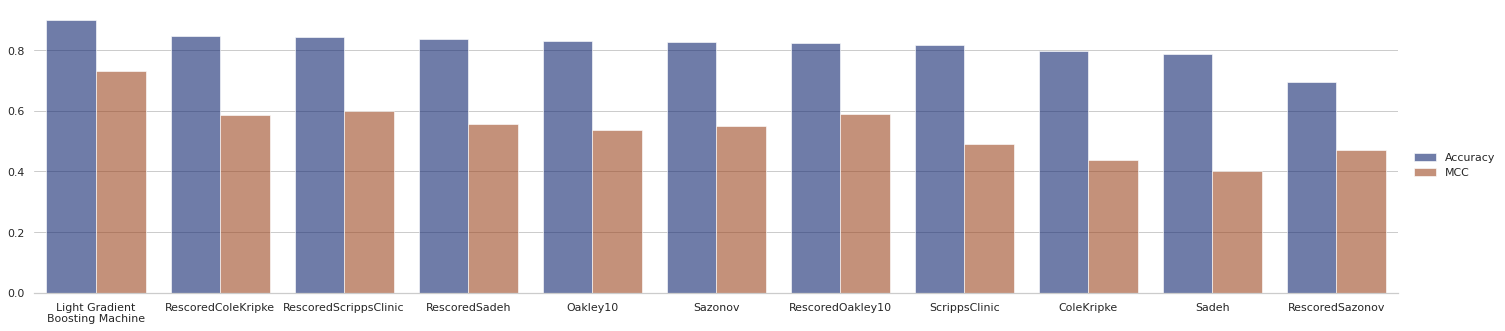

In [139]:


sns.set_theme(style="whitegrid")

result_melted = result_melted.sort_values(by="value", ascending=False)

# Draw a nested barplot by species and sex
g = sns.catplot(
    data=result_melted[result_melted["Metrics"].isin(["Accuracy", "MCC"])], kind="bar",
    x="variable", y="value", hue="Metrics",
    ci="sd", palette="dark", alpha=.6, height=5, aspect=4)

g.despine(left=True)
g.set_axis_labels("", "")
g.legend.set_title("")


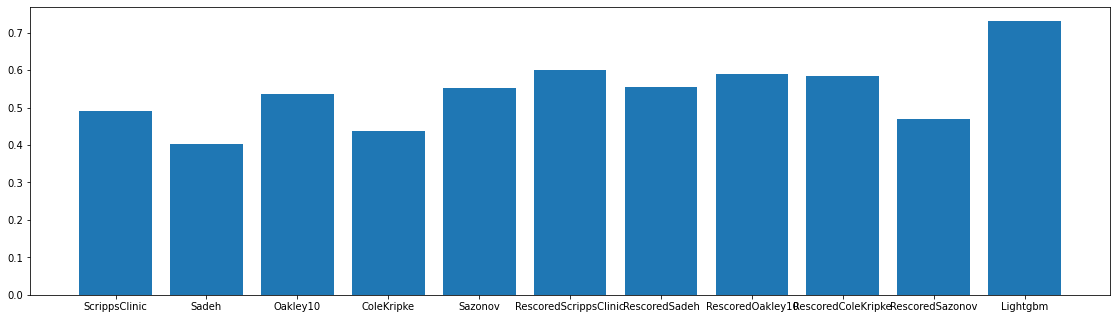

In [44]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_axes([0,0,2.5,1])

mcc = result_bs[result_bs["values"] == "mcc"]
mcc = mcc.reset_index(drop=True).to_dict()
mcc = [(k.split("SleepWindow")[1], mcc[k][0]) for k in mcc.keys() if k.startswith("SleepWindow")]

lgbm_result = df_pycaret[(df_pycaret["model"] == "lightgbm") & 
                         (df_pycaret["window"] == "20min_centered") & 
                         (df_pycaret["featset"] == "tsfresh")                        
                        ]

mcc.append(["Lightgbm", lgbm_result["MCC"].values[0]])


ax.bar([v[0] for v in mcc], [v[1] for v in mcc])
plt.show()



# Consequencies of using our sleep win algorithm

In [4]:
import numpy as np
import os
from tqdm import tqdm
from glob import glob
from datetime import timedelta

from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef

# Sleep boundaries
from hypnospy import Wearable, Experiment
from hypnospy.data import RawProcessing
from hypnospy.analysis import NonWearingDetector, SleepBoudaryDetector, Validator, Viewer, SleepWakeAnalysis, SleepMetrics


In [5]:
def setup_experiment(file_path, start_hour=15):
    # Configure an Experiment
    exp = Experiment()

    # Iterates over a set of files in a directory.
    # Unfortunately, we have to do it manually with RawProcessing because we are modifying the annotations
    for file in glob(file_path):
        pp = RawProcessing(file,
                           # HR information
                           col_for_hr="mean_hr",
                           # Activity information
                           cols_for_activity=["activity"],
                           # Datetime information
                           col_for_datetime="linetime",
                           strftime="%Y-%m-%d %H:%M:%S",
                           # Participant information
                           col_for_pid="mesaid")

        w = Wearable(pp)  # Creates a wearable from a pp object
        # Invert the two_stages flag. Now True means sleeping and False means awake
        w.data["sleep"] = (w.data["stages"] > 0)
        
        exp.add_wearable(w)
        exp.set_freq_in_secs(30)
        w.change_start_hour_for_experiment_day(start_hour)

    return exp

In [270]:
def evaluate_TST():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            sm = SleepMetrics(w)
            # Get TST
            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col="sleep", outputname="TST", normalize_per_hour=False)
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["TST"].values[0]

            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col=alg, outputname= "TST", normalize_per_hour=False)
            df_sm["Alg"] = alg
            df_sm["TST"] = df_sm["TST"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col=alg, 
                                         sleep_period_col="SleepWindow"+alg,
                                         outputname= "TST", normalize_per_hour=False)
            df_sm["Alg"] = alg + "Window"
            df_sm["TST"] = df_sm["TST"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("totalSleepTime", wake_sleep_col=alg,
                                         sleep_period_col="LabelBestML", 
                                         outputname= "TST", normalize_per_hour=False)
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            df_sm["TST"] = df_sm["TST"] - expected_value
            tmp.append(df_sm)

    return pd.concat(tmp)

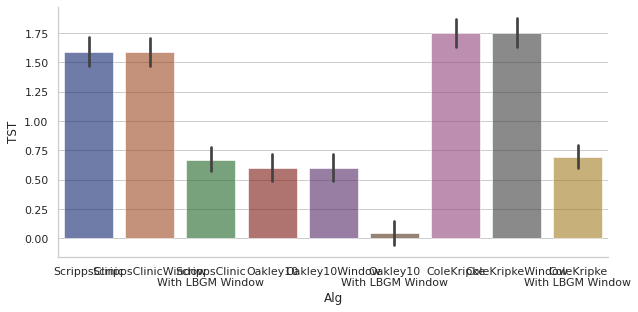

In [271]:
results_sm = evaluate_TST()

g = sns.catplot(
    data=results_sm, kind="bar", # ci="sd",
    x="Alg", y="TST", # hue="Metrics",
    palette="dark", alpha=.6, height=4.5, aspect=2)



In [286]:
def evaluate_awakenings():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            sm = SleepMetrics(w)
            # Get AW
            df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col="sleep", ignore_awakenings_smaller_than_X_minutes=5,
                                         outputname="AW", normalize_per_hour=False)
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["AW"].values[0]

#             df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col=alg, ignore_awakenings_smaller_than_X_minutes=5, 
#                                          outputname= "AW", normalize_per_hour=False)
#             df_sm["Alg"] = alg
#             df_sm["AW"] = df_sm["AW"] - expected_value
#             tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col="SleepWindow"+alg, ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "AW", normalize_per_hour=False)
            df_sm["Alg"] = alg + "Window"
            df_sm["AW"] = df_sm["AW"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("awakenings", wake_sleep_col="LabelBestML", ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "AW", normalize_per_hour=False)
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            df_sm["AW"] = df_sm["AW"] - expected_value
            tmp.append(df_sm)
            
    return pd.concat(tmp)



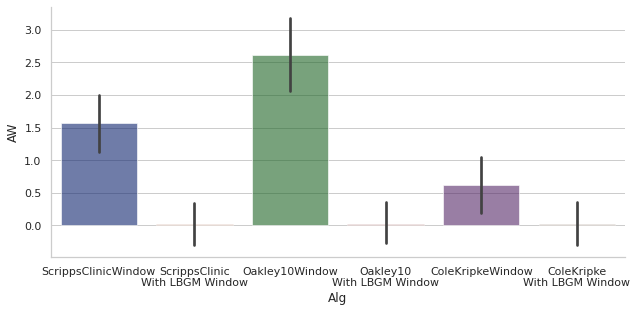

In [287]:
results_aw = evaluate_awakenings()

g = sns.catplot(
    data=results_aw, kind="bar", # ci="sd",
    x="Alg", y="AW", # hue="Metrics",
    palette="dark", alpha=.6, height=4.5, aspect=2)



In [10]:
def evaluate_sleeplatency():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            sm = SleepMetrics(w)
            # Get AW
            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col="sleep",
                                         ignore_awakenings_smaller_than_X_minutes=5, outputname="SL")
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["SL"].values[0]

            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col=alg, outputname= "SL")
            df_sm["Alg"] = alg
            df_sm["SL"] = df_sm["SL"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col="SleepWindow"+alg,
                                         ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SL")
            df_sm["Alg"] = alg + "Window"
            df_sm["SL"] = df_sm["SL"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleeplatency", wake_sleep_col="LabelBestML",
                                         ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SL")
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            df_sm["SL"] = df_sm["SL"] - expected_value
            tmp.append(df_sm)
            
    return pd.concat(tmp)


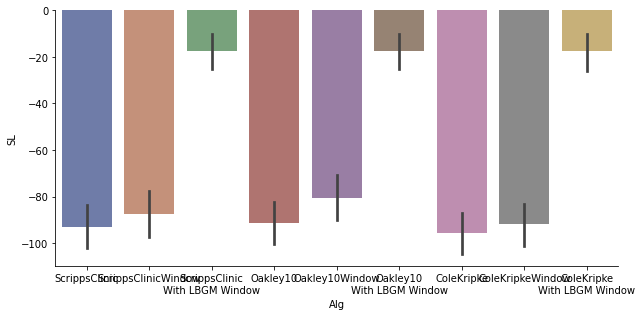

In [13]:
results_sl = evaluate_sleeplatency()
results_sl["SL"] = results_sl["SL"] / 60 # Transform seconds into minutes

g = sns.catplot(
    data=results_sl, kind="bar", # ci="sd",
    x="Alg", y="SL", # hue="Metrics",
    palette="dark", alpha=.6, height=4.5, aspect=2)


In [19]:
def evaluate_sleepefficiency():
    exp = setup_experiment("../data/processed/mesa/*.csv.gz")
    
    # Load results
    best = pd.read_csv("./pycaret/sleep_ml_lightgbm_20min_centered_tsfresh_predictions.csv.gz")
    best = best.rename(columns={"Label": "LabelBestML"})
    df_test = pd.read_csv("../data/processed/train_test_splits/20min_centered/test_pids_raw.csv.gz")
    df_best = pd.concat([df_test, best], axis=1)
    tmp = []
    
    for pid in df_best["pid"].unique():

        w = exp.get_wearable(str(pid))

        # This will append the ML information to the result
        w.data = pd.merge(df_best, w.data, left_on=["gt_time", "pid"], right_on=["linetime", "mesaid"])

        for alg in ["ScrippsClinic", "Oakley10", "ColeKripke"]:

            sm = SleepMetrics(w)
            # Get AW
            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col="sleep",
                                         # ignore_awakenings_smaller_than_X_minutes=5,
                                         outputname="SE")
            df_sm["Alg"] = "ExpectedValue"
            #tmp.append(df_sm)
            expected_value = df_sm["SE"].values[0]

            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col=alg, outputname= "SE")
            df_sm["Alg"] = alg
            df_sm["SE"] = df_sm["SE"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col="SleepWindow"+alg,
                                         #ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SE")
            df_sm["Alg"] = alg + "Window"
            df_sm["SE"] = df_sm["SE"] - expected_value
            tmp.append(df_sm)

            df_sm = sm.get_sleep_quality("sleepefficiency", wake_sleep_col="LabelBestML",
                                         #ignore_awakenings_smaller_than_X_minutes=5, 
                                         outputname= "SE")
            df_sm["Alg"] = alg + "\nWith LBGM Window"
            df_sm["SE"] = df_sm["SE"] - expected_value
            tmp.append(df_sm)
            
    return pd.concat(tmp)


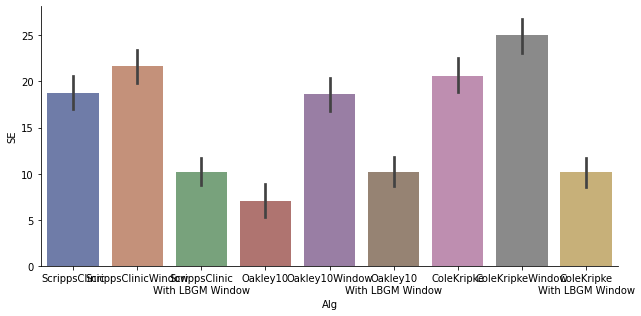

In [20]:
results_ef = evaluate_sleepefficiency()

g = sns.catplot(
    data=results_ef, kind="bar", # ci="sd",
    x="Alg", y="SE", # hue="Metrics",
    palette="dark", alpha=.6, height=4.5, aspect=2)


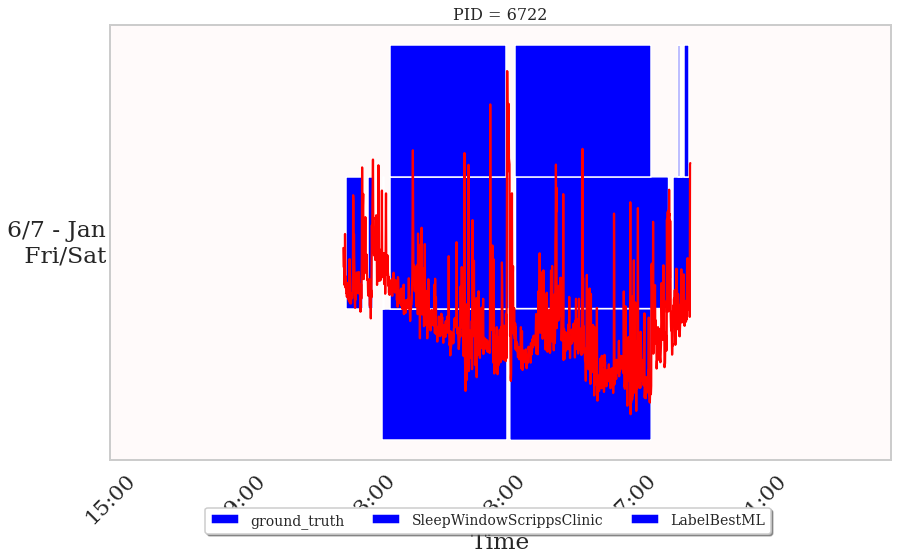

[<Figure size 1008x576 with 2 Axes>]

In [289]:
v = Viewer(w)
v.view_signals(signal_categories=["hr"],
               signal_as_area=["ground_truth", "SleepWindowScrippsClinic", "LabelBestML"],
               alphas={'ground_truth': 0.3, "SleepWindowScrippsClinic": 0.2, "LabelBestML": 0.4},
               colors=["r", "b", "g"]
               )
